In [1]:
import calendar
c = calendar.TextCalendar()
print(c.formatmonth(2024, 1))

    January 2024
Mo Tu We Th Fr Sa Su
 1  2  3  4  5  6  7
 8  9 10 11 12 13 14
15 16 17 18 19 20 21
22 23 24 25 26 27 28
29 30 31



In [29]:
import time as t

lt = [ l for l in range(10000000) ]
# tp = ( t for t in range(10000000) )
tp = tuple(lt)
print(type(lt))
print(type(tp))

<class 'list'>
<class 'tuple'>


In [32]:
start = t.time() # 측정시작. 필수1
for i in lt:
    lts = [1,2,3,4,5,6]
print('list speed check')
print(t.time() - start) # 필수2

list speed check
2.5618207454681396


In [33]:
start2 = t.time() # 측정시작 필수1
for i in tp:
    tps = (1,2,3,4,5,6)
print('tuple speed check')
print(t.time() - start2) # 필수2

tuple speed check
1.1672039031982422


# RESTful(Requests)

## 웹 API(키 없음)

### 환율정보

In [1]:
# 외부 라이브러리.. 환율정보(출처 : 하나은행)
import requests as req
gdata = req.get('https://quotation-api-cdn.dunamu.com/v1/forex/recent?codes=FRX.KRWUSD').json()

In [2]:
print(gdata) # 여기서 date, time와 baseprice 파싱.

[{'code': 'FRX.KRWUSD', 'currencyCode': 'USD', 'currencyName': '달러', 'country': '미국', 'name': '미국 (USD/KRW)', 'date': '2024-01-23', 'time': '09:57:15', 'recurrenceCount': 104, 'basePrice': 1336.4, 'openingPrice': 1334.7, 'highPrice': 1340.8, 'lowPrice': 1334.7, 'change': 'FALL', 'changePrice': 3.6, 'cashBuyingPrice': 1359.78, 'cashSellingPrice': 1313.02, 'ttBuyingPrice': 1323.4, 'ttSellingPrice': 1349.4, 'tcBuyingPrice': None, 'fcSellingPrice': None, 'exchangeCommission': 7.185, 'usDollarRate': 1.0, 'high52wPrice': 1363.5, 'high52wDate': '2023-10-04', 'low52wPrice': 1257.5, 'low52wDate': '2023-07-18', 'currencyUnit': 1, 'provider': '하나은행', 'timestamp': 1705971449962, 'id': 79, 'createdAt': '2016-10-21T06:13:34.000+00:00', 'modifiedAt': '2024-01-23T00:57:30.000+00:00', 'signedChangeRate': -0.0026865672, 'signedChangePrice': -3.6, 'changeRate': 0.0026865672}]


In [3]:
gobj = {
    'date': gdata[0]['date'],
    'time': gdata[0]['time'],
    'basePrice': gdata[0]['basePrice']
}

print(f"{gobj['date']}\t{gobj['time']}\t{gobj['basePrice']}원")

2024-01-23	09:57:15	1336.4원


In [4]:
input = float(input('환전하고 싶은 달러를 입력하세요.') or 10)
res = round(input * gobj['basePrice'], 3)
print(f"지금은 환율 1달러에 {gobj['basePrice']}원 입니다. 요청하신 {input} 달러는 {res}원 입니다.")

환전하고 싶은 달러를 입력하세요. 130.25


지금은 환율 1달러에 1336.4원 입니다. 요청하신 130.25 달러는 174066.1원 입니다.


### 비트코인 정보

In [68]:
import requests as req
gdata = req.get('https://api.bithumb.com/public/ticker/ALL_KRW').json()
gdata

{'status': '0000',
 'data': {'BTC': {'opening_price': '53415000',
   'closing_price': '54933000',
   'min_price': '53407000',
   'max_price': '55439000',
   'units_traded': '3683.64222768',
   'acc_trade_value': '200142510086.3363',
   'prev_closing_price': '53415000',
   'units_traded_24H': '10523.16193347',
   'acc_trade_value_24H': '571076909542.1325',
   'fluctate_24H': '-122000',
   'fluctate_rate_24H': '-0.22'},
  'ETH': {'opening_price': '3025000',
   'closing_price': '3081000',
   'min_price': '3014000',
   'max_price': '3116000',
   'units_traded': '9609.671118',
   'acc_trade_value': '29448351631.7366',
   'prev_closing_price': '3026000',
   'units_traded_24H': '31358.42419453',
   'acc_trade_value_24H': '97114785987.7872',
   'fluctate_24H': '-139000',
   'fluctate_rate_24H': '-4.32'},
  'ETC': {'opening_price': '30630',
   'closing_price': '31600',
   'min_price': '30620',
   'max_price': '32200',
   'units_traded': '289631.3125047',
   'acc_trade_value': '9058289005.5805',

In [69]:
BTC = gdata['data']['BTC']
print(BTC)

{'opening_price': '53415000', 'closing_price': '54933000', 'min_price': '53407000', 'max_price': '55439000', 'units_traded': '3683.64222768', 'acc_trade_value': '200142510086.3363', 'prev_closing_price': '53415000', 'units_traded_24H': '10523.16193347', 'acc_trade_value_24H': '571076909542.1325', 'fluctate_24H': '-122000', 'fluctate_rate_24H': '-0.22'}


In [70]:
# 여기서 최대가, 최소가, 시가 출력
btc = {
    'max': float(BTC['max_price']),
    'min': float(BTC['min_price']),
    'open': float(BTC['opening_price'])
}

In [71]:
print(f"최근 비트코인시세는 1코인당 시가 {btc['open']}원, 최대가 {btc['max']}원, 최소가 {btc['min']}원이 되겠습니다.")

band = btc['max'] - btc['min']

if btc['max'] < ( btc['open'] + band ):
    print('상승장')
else:
    print('하락장')

# 최근 비트코인시세는 1코인당 시가 56155000.0원, 최대가 56368000.0원, 최소가 54556000.0원이 되겠습니다.
# 상승장

최근 비트코인시세는 1코인당 시가 53415000.0원, 최대가 55439000.0원, 최소가 53407000.0원이 되겠습니다.
상승장


### 과제
- 1시간마다 환율, 비트코인 정보 갱신해서 파일화 시키기.

In [17]:
print(gobj, btc)

{'date': '2024-01-23', 'time': '09:57:15', 'basePrice': 1336.4} {'max': 56368000.0, 'min': 54556000.0, 'open': 56155000.0}


In [27]:
!pip3 install keyboard

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 45.9 kB/s eta 0:00:00a 0:00:01


In [37]:
import requests as req
import time as t
import json
import keyboard

def getData():
    gdata = req.get('https://quotation-api-cdn.dunamu.com/v1/forex/recent?codes=FRX.KRWUSD').json()[0]
    gobj = {
        'date': gdata['date'],
        'time': gdata['time'],
        'basePrice': gdata['basePrice']
    }

    gdata = req.get('https://api.bithumb.com/public/ticker/ALL_KRW').json()
    btc = {
        'max': float(BTC['max_price']),
        'min': float(BTC['min_price']),
        'open': float(BTC['opening_price'])
    }

    return { 'frx': gobj, 'btc': btc }

# temp : 60s > origin : 3600s
def fileSaveperOneHour(fname):
    while True:
        jdata = getData()
        
        with open(f'./out/frxbtc/{fname} {t.ctime().strip()}.json', 'w') as f:
            json.dump(jdata, f)
            print(f"save {fname} {t.ctime().strip()}.json")
        t.sleep(60 * 60)
        # if keyboard.is_pressed("q"):
        #     print("exit")
        #     break

In [38]:
fileSaveperOneHour('frxbtcdata')

save frxbtcdata Tue Jan 23 11:36:18 2024.json


KeyboardInterrupt: 

## 웹 API (with 키) REST API GET방식

### 웹상의 데이터 가져오기

In [9]:
import requests as req

from dotenv import load_dotenv

# load .env
load_dotenv()

# DECODE 키.
key = os.environ.get('PUB_DECODE_KEY')

url = 'http://apis.data.go.kr/6260000/AirQualityInfoService/getAirQualityInfoClassifiedByStation'
num = 100
params ={'serviceKey' : key, 
         'pageNo' : '1', 
         'numOfRows' : num, 
         'resultType' : 'json'
}

response = req.get(url, params)
rdata = response.json()
# print(rdata)

In [26]:
import time as t

rlist = rdata['getAirQualityInfoClassifiedByStation']['body']['items']['item']

inp = input('원하는 지역이름을 적어주세요.') or '전포동'
start = t.time()
flist = list(filter(lambda c: inp == c['site'], rlist))

if 0 < len(flist):
    for v in flist:
        print(f"=={v['controlnumber']}== {inp} 지역\n 초미세먼지 : {v['pm25']}, 미세먼지 {v['pm10']}")
else:
    print('해당 지역을 찾을 수 없습니다.')
print( t.time() - start )

원하는 지역이름을 적어주세요. 남부민동


해당 지역을 찾을 수 없습니다.
0.0015223026275634766


## 웹 API (with 키) REST API POST방식

### 카카오 kogpt를 통한 post 구현방향 예시

In [9]:
# coding=utf8
# REST API 호출에 필요한 라이브러리
import requests
import json

from dotenv import load_dotenv

# load .env
load_dotenv()

# [내 애플리케이션] > [앱 키] 에서 확인한 REST API 키 값 입력
REST_API_KEY = os.environ.get('KAKAO_API_KEY')

# KoGPT API 호출을 위한 메서드 선언
# 각 파라미터 기본값으로 설정
def kogpt_api(prompt, max_tokens = 1, temperature = 1.0, top_p = 1.0, n = 1):
    r = requests.post(
        'https://api.kakaobrain.com/v1/inference/kogpt/generation',
        json = {
            'prompt': prompt,
            'max_tokens': max_tokens,
            'temperature': temperature,
            'top_p': top_p,
            'n': n
        },
        headers = {
            'Authorization': 'KakaoAK ' + REST_API_KEY,
            'Content-Type': 'application/json'
        }
    )
    # 응답 JSON 형식으로 변환
    response = json.loads(r.content)
    return response

In [10]:
# KoGPT에게 전달할 명령어 구성
prompt = '''국내 건설 엔지니어링 업체가 사우디아라비아 상하수도 설계를 맡는다.
엔지니어링업체 '건화'가 사우디아라비아 상하수도 확장·개선사업 설계사로 선정됐다고 환경부가 22일 밝혔다.
 계약 규모는 약 1천16억원(2억9천만리얄)이다.
이번 수주로 상하수도 건설과 시공 등 6조원 규모일 것으로 추산되는 본사업도 국내 건설사가 수주할 가능성이 커졌다고 환경부는 설명했다.
사우디아라비아는 석유 고갈에 대비한 경제 다각화 프로젝트 '비전 2030' 하나로 2050년까지 32조원을 투입해 상하수도를 전면 개편하는 사업을 추진 중이다.
이 사업은 6개 권역으로 나눠 진행되는데 3권역 설계를 건화가 맡는다.
건화는 작년부터 외국 진출 희망 기업과 환경부 소통창구인 '녹색산업 협의체'에 참여해 사우디아라비아 상하수도 사업 설계 수주 전략을 논의해왔다고 한다. 
환경부는 작년 5월 한화진 장관이 사우디아라비아를 방문했을 때 국내 상하수도 설계업체 현지 진출 방안을 현지 당국과 논의한 바 있다. 

한줄 요약:'''

# 파라미터를 전달해 kogpt_api()메서드 호출
response = kogpt_api(
    prompt, max_tokens=128, top_p=0.7
)

print(response)

{'id': '9998fe42-8a7a-4b6e-8701-6967b705d571', 'generations': [{'text': " 지난 2월 중국에서 열린 세계 최대 물 산업 박람회 'WATER WORLD 2019'에서 해외시장 판로 개척에 나선 국내 엔지니어링 업체 건화의 해외사업팀 'Global Developer Group'의 임직원들이 중동지역에 진출하기 위한 가시적인 성과들을 도출하고 있으며, 그 중 사우디아라비아의 수도 리야드 지역에 위치한 상수도 관리기관인 PMAS사와 상하수도 분야 전반에 대한 컨설팅 업무 협약 체결식을 가졌다.", 'tokens': 95}], 'usage': {'prompt_tokens': 231, 'generated_tokens': 95, 'total_tokens': 326}}


### 카카오 API karlo를 통한 post예시

In [6]:
!pip3 install Pillow

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 687.5 kB/s eta 0:00:0000:0100:01


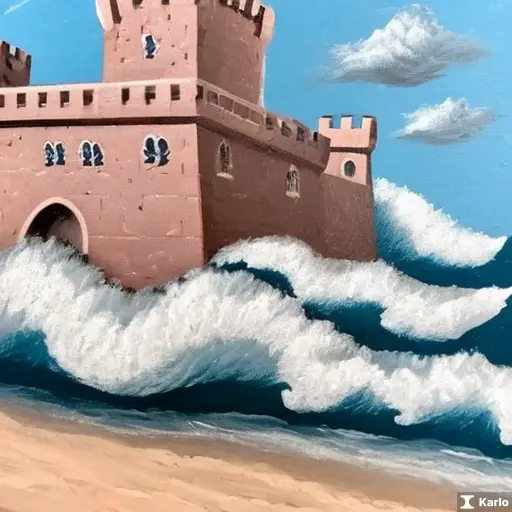

In [11]:
# REST API 호출, 이미지 파일 처리에 필요한 라이브러리
import requests
import json
import urllib
from PIL import Image

from dotenv import load_dotenv

# load .env
load_dotenv()

# [내 애플리케이션] > [앱 키] 에서 확인한 REST API 키 값 입력
REST_API_KEY = os.environ.get('KAKAO_API_KEY')

# 이미지 생성하기 요청
def t2i(prompt, negative_prompt):
    r = requests.post(
        'https://api.kakaobrain.com/v2/inference/karlo/t2i',
        json = {
            'prompt': prompt,
            'negative_prompt': negative_prompt
        },
        headers = {
            'Authorization': f'KakaoAK {REST_API_KEY}',
            'Content-Type': 'application/json'
        }
    )
    # 응답 JSON 형식으로 변환
    response = json.loads(r.content)
    return response

# 프롬프트에 사용할 제시어
prompt = "castle painting waves"
negative_prompt = "Twinkle, lake, waterfall"

# 이미지 생성하기 REST API 호출
response = t2i(prompt, negative_prompt)
# print(response['images'][0]['image'])

res = Image.open(urllib.request.urlopen(response.get("images")[0].get("image")))
res
# 응답의 첫 번째 이미지 생성 결과 출력하기
# result = Image.open(urllib.request.urlopen(response.get("images")[0].get("image")))
# result.show()

### 번역기 만들어보기

In [1]:
import os
import sys
import urllib.request
import json

from dotenv import load_dotenv

# load .env
load_dotenv()

client_id = os.environ.get('NAVER_API_ID')
client_secret = os.environ.get('NAVER_API_PW')

In [2]:
indata = input('영어로 번역할 내용입력.') or "반갑습니다."

encText = urllib.parse.quote(indata)
data = "source=ko&target=en&text=" + encText
url = "https://openapi.naver.com/v1/papago/n2mt"
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request, data=data.encode("utf-8"))
rescode = response.getcode()
if(rescode==200):
    response_body = json.loads(response.read().decode('utf-8'))
    print(response_body['message']['result']['translatedText'])
else:
    print("Error Code:" + rescode)

영어로 번역할 내용입력. 키가 정상적으로 동작됩니다.


The key operates normally.


### 뉴스뽑아보기

In [7]:
from dotenv import load_dotenv

# load .env
load_dotenv()

client_id = os.environ.get('NAVER_API2_ID')
client_secret = os.environ.get('NAVER_API2_PW')

In [8]:
# 덤으로 속보검색
indata = input('검색할 키워드') or "속보"

url = "https://openapi.naver.com/v1/search/news?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = json.loads(response.read().decode('utf-8'))
    print(response_body)
else:
    print("Error Code:" + rescode)


# 네이버 검색 API 예제 - 블로그 검색


# if(rescode==200):
#     response_body = response.read()
#     print(response_body.decode('utf-8'))
# else:
#     print("Error Code:" + rescode)

검색할 키워드 


{'lastBuildDate': 'Wed, 24 Jan 2024 11:02:16 +0900', 'total': 943, 'start': 1, 'display': 10, 'items': [{'title': '보안업계도 AI가 싹 바꾼다', 'originallink': 'https://www.epnc.co.kr/news/articleView.html?idxno=240151', 'link': 'https://www.epnc.co.kr/news/articleView.html?idxno=240151', 'description': '시스템 또는 네트워크의 사용자 활동 패턴을 분석해 <b>정상적</b>인 <b>동작</b>과 비교한다. 이를 위해 대량의... <b>키</b>, 성별, 혹은 옷이나 자세와 같은 사람의 신체적 특징을 가지고 사람을 식별하는 방법이다. 또한 활동 패턴을... ', 'pubDate': 'Tue, 23 Jan 2024 08:02:00 +0900'}, {'title': "'폭망' 중국 축구의 현주소, '피파랭킹 106위' 타지키스탄과 0-0 무승부…&quot;이...", 'originallink': 'http://www.interfootball.co.kr/news/articleView.html?idxno=622229', 'link': 'https://sports.news.naver.com/news.nhn?oid=413&aid=0000171122', 'description': '선수를 올바른 위치에 배치하지 않으면 어떻게 <b>정상적으로</b> 경기를 할 수 있는가&quot;라면서 전술에 아쉬움을... 잘릴로프는 환상적인 터닝 <b>동작</b> 후에 슈팅했으나, 몸을 날린 골키퍼에게 막혔다. 세컨볼은 중국 수비수가... ', 'pubDate': 'Sun, 14 Jan 2024 09:40:00 +0900'}, {'title': '&quot;북한 해킹 조직 스피어피싱 메일에 25%가 의심 없이 회신&quot;', 'originallink': 'http://w

In [5]:
lastdate = response_body['lastBuildDate']
articles = response_body['items']
print(lastdate, articles)

Wed, 24 Jan 2024 11:01:30 +0900 [{'title': '보안업계도 AI가 싹 바꾼다', 'originallink': 'https://www.epnc.co.kr/news/articleView.html?idxno=240151', 'link': 'https://www.epnc.co.kr/news/articleView.html?idxno=240151', 'description': '시스템 또는 네트워크의 사용자 활동 패턴을 분석해 <b>정상적</b>인 <b>동작</b>과 비교한다. 이를 위해 대량의... <b>키</b>, 성별, 혹은 옷이나 자세와 같은 사람의 신체적 특징을 가지고 사람을 식별하는 방법이다. 또한 활동 패턴을... ', 'pubDate': 'Tue, 23 Jan 2024 08:02:00 +0900'}, {'title': "'폭망' 중국 축구의 현주소, '피파랭킹 106위' 타지키스탄과 0-0 무승부…&quot;이...", 'originallink': 'http://www.interfootball.co.kr/news/articleView.html?idxno=622229', 'link': 'https://sports.news.naver.com/news.nhn?oid=413&aid=0000171122', 'description': '선수를 올바른 위치에 배치하지 않으면 어떻게 <b>정상적으로</b> 경기를 할 수 있는가&quot;라면서 전술에 아쉬움을... 잘릴로프는 환상적인 터닝 <b>동작</b> 후에 슈팅했으나, 몸을 날린 골키퍼에게 막혔다. 세컨볼은 중국 수비수가... ', 'pubDate': 'Sun, 14 Jan 2024 09:40:00 +0900'}, {'title': '&quot;북한 해킹 조직 스피어피싱 메일에 25%가 의심 없이 회신&quot;', 'originallink': 'http://www.itdaily.kr/news/articleView.html?idxno=219311', 'link': 'http://www.

In [66]:
!pip3 install pandas

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 MB 701.4 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 488.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 667.4 kB/s eta 0:00:0000:0100:01


In [6]:
import pandas as pd
pdarts = pd.DataFrame(articles)
pdarts

/tmp/ipykernel_8960/1397159497.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,title,originallink,link,description,pubDate
0,보안업계도 AI가 싹 바꾼다,https://www.epnc.co.kr/news/articleView.html?i...,https://www.epnc.co.kr/news/articleView.html?i...,시스템 또는 네트워크의 사용자 활동 패턴을 분석해 <b>정상적</b>인 <b>동작<...,"Tue, 23 Jan 2024 08:02:00 +0900"
1,"'폭망' 중국 축구의 현주소, '피파랭킹 106위' 타지키스탄과 0-0 무승부…&q...",http://www.interfootball.co.kr/news/articleVie...,https://sports.news.naver.com/news.nhn?oid=413...,선수를 올바른 위치에 배치하지 않으면 어떻게 <b>정상적으로</b> 경기를 할 수 ...,"Sun, 14 Jan 2024 09:40:00 +0900"
2,&quot;북한 해킹 조직 스피어피싱 메일에 25%가 의심 없이 회신&quot;,http://www.itdaily.kr/news/articleView.html?id...,http://www.itdaily.kr/news/articleView.html?id...,확인하고 <b>동작</b>여부를 결정한다. 특정 백신 프로그램 사용 여부 확인 소스...,"Wed, 03 Jan 2024 19:48:00 +0900"
3,&quot;회신을 부탁드립니다&quot;…더 치밀하고 교묘해진 피싱,http://www.newsis.com/view/?id=NISX20240103_00...,https://n.news.naver.com/mnews/article/003/001...,"특히, 백신 프로그램에 탐지돼 삭제되지 않도록 특정 백신 프로그램의 설치 여부를 확...","Wed, 03 Jan 2024 17:31:00 +0900"
4,"북한 해커조직 김수키가 보낸 스피어피싱 메일, 4명 중 1명은 ‘회신’",http://www.boannews.com/media/view.asp?idx=125...,http://www.boannews.com/media/view.asp?idx=125...,확인하고 <b>동작</b> 여부를 결정한다. 하우리 보안대응센터는 “이번에 확인된 ...,"Wed, 03 Jan 2024 14:44:00 +0900"
5,북한 해킹 조직 스피어피싱 메일 공격에 평균 25%가 응답…심각한 수준,https://www.dailysecu.com/news/articleView.htm...,https://www.dailysecu.com/news/articleView.htm...,확인하고 <b>동작</b>여부를 결정한다. 하우리 보안대응센터는 &quot;이번에 ...,"Wed, 03 Jan 2024 12:32:00 +0900"
6,[2024 이메일 보안 리포트] 사이버 공격의 시작은 이메일로부터 시작된다,http://www.boannews.com/media/view.asp?idx=125...,http://www.boannews.com/media/view.asp?idx=125...,"공격자들이 비밀번호 살포, 피싱, 멀웨어 심기 등 각종 테크닉을 동원해 <b>정상적...","Sun, 31 Dec 2023 20:04:00 +0900"
7,넥슨 '남혐 손가락' 논란에 여직원이 올린 글,https://www.ggilbo.com/news/articleView.html?i...,https://www.ggilbo.com/news/articleView.html?i...,이어 &quot;정신이 건강하고 <b>정상적</b>인 사고가 있다면 그런 행동을 하...,"Wed, 29 Nov 2023 07:06:00 +0900"
8,그치지 않는 게임 속 ‘혐오’… 젠더 갈등에 불똥 튄 게임사,https://news.kmib.co.kr/article/view.asp?arcid...,https://n.news.naver.com/mnews/article/005/000...,넣은 <b>동작</b>은 절대 아니다”며 “해당 스태프는 <b>키</b> 프레임을 ...,"Tue, 28 Nov 2023 19:21:00 +0900"
9,'그 손가락' 등장에 게임업계 '화들짝'...&quot;당연한 조치&quot; vs...,http://www.1conomynews.co.kr/news/articleView....,http://www.1conomynews.co.kr/news/articleView....,넣은 <b>동작</b>은 절대 아니다&quot;라며 &quot;해당 스태프는 <b>...,"Mon, 27 Nov 2023 13:22:00 +0900"


# Web Crawling

## 부산대학교 학식정보 크롤링

In [4]:
!pip3 install html5lib

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 209.4 kB/s eta 0:00:00a 0:00:01


In [1]:
import requests as req
from bs4 import BeautifulSoup as bfs
web = req.get('https://www.pusan.ac.kr/kor/CMS/MenuMgr/menuListOnBuilding.do')
soup = bfs(web.content, 'html5lib')
# table = soup.select(".menu-tbl")
day = soup.select(".menu-tbl .day")
date = soup.select(".menu-tbl .date")
wons = soup.select("h3.menu-tit01")
menus = soup.select("h3.menu-tit01+p")

In [15]:
for d,dd,w,m in zip(day, date, wons, menus):
    print('-' * 18)
    print( d.text, dd.text, w.text )
    print('-' * 18)
    print(m.text)
    print('-' * 18)
    print('\n'*3)

------------------
월 2024.01.22 정식-5,500원
------------------
백미밥
동태국
돈육볶음
해쉬브라운+케찹
쫄면야채무침
청경채겉절이
포기김치

------------------




------------------
화 2024.01.23 정식-5,500원
------------------
잡곡밥
시락국
치즈돈가스/소스
마파두부
치커리유자청샐러드
콩나물무침
포기김치

------------------




------------------
수 2024.01.24 정식-5,500원
------------------
백미밥
감자탕
생선가스/소스
떡볶기
다시마채무침
상추겉절이
포기김치

------------------




------------------
목 2024.01.25 정식-5,500원
------------------
백미밥
바지락미역국
언양산적/소스
카레
사각어묵매콤무침
오이무침
포기김치

------------------




------------------
금 2024.01.26 정식-5,500원
------------------
잡곡밥
우동
순살치킨/맛초킹소스
순대매콤볶음
후랑크햄옥수수콘볶음
콩나물무침
포기김치

------------------






In [5]:
print(day)

[<div class="day">월</div>, <div class="day">화</div>, <div class="day">수</div>, <div class="day">목</div>, <div class="day">금</div>, <div class="day">토</div>]


In [1]:
#여기서 lunch.py만들어서 이후 import 원하는 식단표 요일 입력하면 출력하도록 만들기
f = open('lunch.py', 'w')
data = '''import requests as req
from bs4 import BeautifulSoup as bfs

import sys

class Lunch:
    def __init__(self):
        self.web = req.get('https://www.pusan.ac.kr/kor/CMS/MenuMgr/menuListOnBuilding.do')
        self.soup = bfs(self.web.content, 'html5lib')

    def GetLunch(self, __date):
        day = self.soup.select(".menu-tbl .day")
        date = self.soup.select(".menu-tbl .date")
        wons = self.soup.select("h3.menu-tit01")
        menus = self.soup.select("h3.menu-tit01+p")

        tddidx = [ i for i, d in enumerate(day) if __date == d.text ][0]

        print('-' * 18)
        print( day[tddidx].text, date[tddidx].text, wons[tddidx].text )
        print('-' * 18)
        print(menus[tddidx].text)
        print('-' * 18)
        print('\\n'*3)



if "__main__" == __name__:
    _date = sys.argv[1]
    l = Lunch()
    l.GetLunch(_date)

'''
f.write(data)
f.close()

In [2]:
import lunch as lch
l = lch.Lunch()

In [3]:
l.GetLunch('월')

------------------
월 2024.01.22 정식-5,500원
------------------
백미밥
동태국
돈육볶음
해쉬브라운+케찹
쫄면야채무침
청경채겉절이
포기김치

------------------






In [4]:
l.GetLunch('목')

------------------
목 2024.01.25 정식-5,500원
------------------
백미밥
바지락미역국
언양산적/소스
카레
사각어묵매콤무침
오이무침
포기김치

------------------






In [8]:
import requests as req
from bs4 import BeautifulSoup as bfs

# bexco 행사 일정표 땡겨오기
web = req.get('https://www.bexco.co.kr/kor/CMS/EventScheduleMgr/list.do?robot=Y&mCode=MN214&page=1')
soup = bfs(web.content, 'html.parser')

In [41]:
ebox = soup.select(".txtBox")
etitles = soup.select(".txtBox .subject")
edates = soup.select(".txtBox .date")
eplaces = soup.select(".txtBox .place")

print("BEXCO 전시 일정")
print("="*18)
print("\n")

for et, ed, ep in zip( etitles, edates, eplaces ):
    print("="*18)
    print(et.text)
    print(list(ed.text.strip().replace('\t', '').replace('\r', '').replace('\n', '').split('~')))
    print(ep.text)
    print("="*18)
    print("\n"*3)


BEXCO 전시 일정


미래엔 초코 전국 초등 학부모 강연회
['2024-01-24', '2024-01-24']
 컨벤션홀 104-105호




2024 SKALAR User Seminar 
['2024-01-24', '2024-01-24']
 제1전시장 회의실 311호




공공건축물 그린리모델링 사업 설계/시공 방안 설명회
['2024-01-24', '2024-01-24']
 제1전시장 회의실 217-218호




룰루랄라 레이싱 키즈월드
['2023-12-02', '2024-03-03']
 제2전시장 1층 4(C-F)홀




2024 상상체험 키즈월드
['2023-12-02', '2024-08-31']
 제2전시장 3층 5(B-E)홀 




제1회 첨단 측정·분석 워크숍
['2024-01-25', '2024-01-25']
 컨벤션홀 202호




크라운제과 V데이 코디교육
['2024-01-25', '2024-01-25']
 제1전시장  회의실 214-216호




2024년 정도관리 대상기관 연찬회
['2024-01-25', '2024-01-26']
 컨벤션홀 301호, 로비




2024 제36회 부산 베이비&육아교육용품전
['2024-01-25', '2024-01-28']
 제1전시장  3홀




설비관리 강연회 (설비자산의 수명연장과 고장예방 전략)
['2024-01-26', '2024-01-26']
 제1전시장  회의실 213호




우수중소기업 및 농특산품 선물 박람회
['2024-01-26', '2024-01-30']
 제1전시장  2B홀




제51차 광안신협 정기총회
['2024-01-27', '2024-01-27']
 컨벤션홀 101-104호, 106-109호




벡스코 영국/네덜란드 유학 박람회
['2024-01-27', '2024-01-27']
 컨벤션홀 208-1, 208-2호




2024년 서울/부산 호주유학박람회
['2024-01-27', '2024-01-27']
 제1전시장  회의실 211-212호

In [1]:
f = open('bexcoDate.py', 'w')
data = '''import requests as req
from bs4 import BeautifulSoup as bfs

import sys

class BexcoEvent:
    def __init__(self, __vpage=1):
        self.web = req.get(f'https://www.bexco.co.kr/kor/CMS/EventScheduleMgr/list.do?robot=Y&mCode=MN214&page={__vpage}')
        self.soup = bfs(self.web.content, 'html.parser')

    def turnpage(self, __vpage=1):
        self.web = req.get(f'https://www.bexco.co.kr/kor/CMS/EventScheduleMgr/list.do?robot=Y&mCode=MN214&page={__vpage}')
        self.soup = bfs(self.web.content, 'html.parser')
        self.EventListPrint()

    def EventListPrint(self):
        ebox = self.soup.select(".txtBox")
        etitles = self.soup.select(".txtBox .subject")
        edates = self.soup.select(".txtBox .date")
        eplaces = self.soup.select(".txtBox .place")
        
        print("BEXCO 전시 일정")
        print("="*18)
        print("\\n")
        
        for et, ed, ep in zip( etitles, edates, eplaces ):
            print("="*18)
            print(et.text)
            print(list(ed.text.strip().replace('\\t', '').replace('\\r', '').replace('\\n', '').split('\~')))
            print(ep.text)
            print("="*18)
            print("\\n"*3)

if "__main__" == __name__:
    _page = int(sys.argv[1])
    l = BexcoEvent(_page)
    l.EventListPrint()

'''

f.write(data)
f.close()

In [2]:
import bexcoDate as bevent
be = bevent.BexcoEvent()
be.EventListPrint()

BEXCO 전시 일정


미래엔 초코 전국 초등 학부모 강연회
['2024-01-24~2024-01-24']
 컨벤션홀 104-105호




2024 SKALAR User Seminar 
['2024-01-24~2024-01-24']
 제1전시장 회의실 311호




공공건축물 그린리모델링 사업 설계/시공 방안 설명회
['2024-01-24~2024-01-24']
 제1전시장 회의실 217-218호




룰루랄라 레이싱 키즈월드
['2023-12-02~2024-03-03']
 제2전시장 1층 4(C-F)홀




2024 상상체험 키즈월드
['2023-12-02~2024-08-31']
 제2전시장 3층 5(B-E)홀 




제1회 첨단 측정·분석 워크숍
['2024-01-25~2024-01-25']
 컨벤션홀 202호




크라운제과 V데이 코디교육
['2024-01-25~2024-01-25']
 제1전시장  회의실 214-216호




2024년 정도관리 대상기관 연찬회
['2024-01-25~2024-01-26']
 컨벤션홀 301호, 로비




2024 제36회 부산 베이비&육아교육용품전
['2024-01-25~2024-01-28']
 제1전시장  3홀




설비관리 강연회 (설비자산의 수명연장과 고장예방 전략)
['2024-01-26~2024-01-26']
 제1전시장  회의실 213호




우수중소기업 및 농특산품 선물 박람회
['2024-01-26~2024-01-30']
 제1전시장  2B홀




제51차 광안신협 정기총회
['2024-01-27~2024-01-27']
 컨벤션홀 101-104호, 106-109호




벡스코 영국/네덜란드 유학 박람회
['2024-01-27~2024-01-27']
 컨벤션홀 208-1, 208-2호




2024년 서울/부산 호주유학박람회
['2024-01-27~2024-01-27']
 제1전시장  회의실 211-212호




자유민주당 발대식
['2024-01-27~2024-01-27']
 

In [3]:
be.turnpage(5)

BEXCO 전시 일정


제2회 부산국제주류산업박람회
['2024-08-15~2024-08-18']
 제1전시장  2홀




부산 인디커넥트페스티벌 2024
['2024-08-16~2024-08-18']
 제1전시장  1홀




2024 부산 반려동물 박람회(상)
['2024-08-30~2024-09-01']
 제2전시장 4(A-C)홀




기후산업국제박람회
['2024-09-04~2024-09-06']
 제1전시장 




 K-ICT WEEK in BUSAN (AI KOREA, CLOUD EXPO, IT EXPO)
['2024-09-11~2024-09-13']
 제2전시장




우수중소기업 및 농특산품 선물 박람회
['2024-09-12~2024-09-16']
 제1전시장  3B홀




코믹월드 부산 125
['2024-09-21~2024-09-22']
 제2전시장 4(A-E)홀




2024 인테리어디자인코리아 부산
['2024-09-26~2024-09-29']
 제1전시장  2홀




제25회 부산국제관광전
['2024-09-26~2024-09-29']
 제1전시장  3홀




제36회 2024 부산창업박람회
['2024-09-26~2024-09-28']
 제2전시장 4(A-C)홀




2024 부산 코리아빌드
['2024-09-26~2024-09-29']
 제1전시장  1홀




오프쇼어 코리아 2024
['2024-10-16~2024-10-18']
 제1전시장 




부산국제수산엑스포
['2024-11-06~2024-11-08']
 제1전시장 




국제게임전시회 지스타
['2024-11-14~2024-11-17']
 제1전시장 




초읍 하늘채 포레스원 입주설명회
['2024-01-21~2024-01-21']
 제1전시장  회의실 314-317호




iTEF 2024 유학박람회
['2024-01-20~2024-01-20']
 회의실 214-216호






## 네이버 주식정보 크롤링하기

In [15]:
# https://finance.naver.com/sise/lastsearch2.nhn
import requests as req
from bs4 import BeautifulSoup as bfs

url = "https://finance.naver.com/sise/lastsearch2.nhn"
web = req.get(url)
soup = bfs(web.content, 'html.parser')



# base.
# soup.find('삼성전자')

contents = soup.find_all(class_="tltle")
# print(contents.text)
# for data, n, in zip(contents, range(len(contents))):
for n, data in enumerate(contents, 1):
    
    print(f'{n} : {data.text}')

1 : 제주반도체
2 : 삼성전자
3 : 우진엔텍
4 : POSCO홀딩스
5 : 에코프로머티
6 : SK하이닉스
7 : 셀트리온
8 : 이수페타시스
9 : 엔케이맥스
10 : 에코프로
11 : 신성델타테크
12 : SFA반도체
13 : HLB
14 : 삼성바이오로직스
15 : 코세스
16 : LG화학
17 : 삼성SDI
18 : 미스터블루
19 : 대한전선
20 : 엔켐
21 : 에코프로비엠
22 : 카나리아바이오
23 : LS머트리얼즈
24 : 어보브반도체
25 : 카카오
26 : 알루코
27 : SK이노베이션
28 : 폴라리스오피스
29 : 두산로보틱스
30 : 이스트소프트


In [26]:
# 쌩 html내에서 찾아보기.
# beautiful soap 모를때..
# find로 스트링 시작값 찾아내기.
html = web.text
# print(html.find('74,000'))
print(html[34526:34530], html[34599:34605])

삼성전자 74,000


In [48]:
# https://www.melon.com/new/index.htm

import requests as req
from bs4 import BeautifulSoup as bfs

# 낮은단계 방어뚫기;;;
header = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.75 Safari/537.36"}

url = "https://www.melon.com/new/index.htm"
web = req.get(url, headers=header)
soup = bfs(web.content, 'html.parser')

In [51]:
songs = soup.select(".wrap_song_info")
song_titles = soup.select(".wrap_song_info .rank01")
song_artists = soup.select(".wrap_song_info .rank02 span")

print("최신 차트 멜론 차트곡")
print("="*23)

for i, (title, artist) in enumerate(zip(song_titles, song_artists)):
    print(i+1, title.text.replace('\n', ''), artist.text.replace('\n', ''))
    # print( [i+1, title.text, artist.text] )

최신 차트 멜론 차트곡
1 SHXT (feat. XYLØ) 류수정
2 연락선 박혜신
3 사랑이 다른 사랑으로 잊혀지네 웅산
4 우리를 에워싼 꿈속에서 윤정훈
5 너의 자리 주예인
6 내 마음 안에 넌 변하지 않는거야 (by SO HYUN) merrymerryseoul
7 사랑하지 말 걸 그랬어 성수진
8 Without U 설아 (우주소녀)
9 Slowly (Feat. 헤이즈) I.M (아이엠)
10 나무가 될게 박강수
11 미워 죽겠어 동경
12 어떻게 우리 헤어질 수가 있어 주현민
13 One Two (feat. CHERRY BOY 17) TOKAI (토케이)
14 Shower Song 홍다빈
15 루즈 (LOSE) 컴 (COME)
16 시간의 상처 김소연
17 넌 전설이 될 거야 소냐
18 비틀거리는 행복 에몬
19 Sweet Dreamz Hanbyeol (한별)
20 헤어지기 싫어 유림
21 Wish Ash-B (애쉬비)
22 눈 미강 (MIKANG)
23 괜찮아지겠지 에디킴, 윤종신
24 널 닮은 사람 연규성
25 icecream taste Claire Hau (클레어 하우)
26 진짜로 일어날지도 몰라 기적 이정권
27 모르죠 류민희
28 비밀연애 (Secret Love Affair) ROYDO
29 What's your plan? heyden
30 Get ready, Set, Go! 류지현
31 MACHINES KIDO (키도)
32 Don't wanna be your friend 레몬시티(Lemon City)
33 Suit Up SUPER JUNIOR-L.S.S. (슈퍼주니어-L.S.S.)
34 첫 만남은 계획대로 되지 않아 TWS (투어스)
35 비행기 모드 하츠 (hartts)
36 wait no more (feat. Jay Hook) The Hills (더 힐스)
37 뇌절사랑 밤하늘
38 GRAB ME AB6IX (에이비식스)
39 UGLY EVNNE(이븐)
40 여행가 은오 (Eunoh)
41 살아 colbin (콜빈)
42 아름다웠던 하

## 워크넷 취업정보 크롤링

In [7]:
import requests as req
from bs4 import BeautifulSoup as bfs

url = "https://work.go.kr/empInfo/empInfoSrch/list/dtlEmpSrchList.do?moreCon=more&enterPriseGbn=all&srcKeyword=java+%7C+python&careerTypes=N&pageIndex=1"
web = req.get(url)
soup = bfs(web.content, 'html.parser')

In [107]:
# 출력 url 짧게 만들어보기..
!pip3 install pyshorteners

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


In [111]:
import pyshorteners as ps
sh = ps.Shortener()

# max_page = int(soup.select(".paging_direct")[0].text.strip()[2])
componys = soup.select("tr td.a-l .cp_name")
worktitles = soup.select("tr .cp-info-in>a")

# sh.tinyurl.short(...)
for i, ( compony, worktitle ) in enumerate( zip(componys, worktitles) ):
    print( f"{i + 1} : {worktitle.text.strip()} \n {sh.tinyurl.short('https://work.go.kr/' + worktitle.attrs['href'])}" )

1 : 포인드(주) 인공지능·딥러닝 개발자 채용 (신입) 
 http://tinyurl.com/ywluwqdn
2 : 응용 소프트웨어 개발자를 모집합니다. 
 http://tinyurl.com/ywn7ebl5
3 : 앱 개발자(Android) 인재모집합니다. 
 http://tinyurl.com/ymurtjxz
4 : 2024년 파이낸셜데이타시스템 금융IT 신입 개발자 모집 
 http://tinyurl.com/yuabcqpv
5 : 한국정보기술연구원 IT취업교육 교육생 모집 
 http://tinyurl.com/yrdaf7ub
6 : 선진테크(주) 영상 및 DB변환 SW엔지니어 정규직 채용 
 http://tinyurl.com/yssauhbl
7 : [딜로이트컨설팅] FY24 컨설팅 AID 팀 채용연계형 인턴 모집 
 http://tinyurl.com/yvpbs378
8 : [(주)민소프트] 소프트웨어 개발자 - 청년인턴(휴직대체) 채용 
 http://tinyurl.com/ywb7ahhj
9 : S/W 개발자 신입 채용(윈도우, C#/ WPF, C/ C++, 연봉 3700만) 
 http://tinyurl.com/ywvqcc4s
10 : ㈜파이버프로 2024년도 부문별 채용공고 
 http://tinyurl.com/yv6gcltu


In [1]:
with open('./WorkCrolling.py', 'w') as f:
    data = '''import requests as req
from bs4 import BeautifulSoup as bfs
import pyshorteners as ps

class WCrolling:
    def __init__(self, scons):
        self.sconstr = self.getConstr(scons)
        self.url = f"https://work.go.kr/empInfo/empInfoSrch/list/dtlEmpSrchList.do?moreCon=more&enterPriseGbn=all&srcKeyword={self.sconstr}&careerTypes=N&pageIndex={1}"
        web = req.get(self.url)
        soup = bfs(web.content, 'html.parser')
        self.max_page = int(soup.select(".paging_direct")[0].text.strip()[2])

    def ViewSearchPage(self, __page):

        if 0 > __page or self.max_page < __page: 
            print(f"Out of range index page... ; {__page}")
            return -1
    
        web = req.get(self.url)
        soup = bfs(web.content, 'html.parser')
        
        sh = ps.Shortener()

        componys = soup.select("tr td.a-l .cp_name")
        worktitles = soup.select("tr .cp-info-in>a")

        for i, ( compony, worktitle ) in enumerate( zip(componys, worktitles) ):
            print( f"{i + 1} : {worktitle.text.strip()} \\n {sh.tinyurl.short('https://work.go.kr/' + worktitle.attrs['href'])}" )

    def ChangePage(self, __page):
        self.url = f"https://work.go.kr/empInfo/empInfoSrch/list/dtlEmpSrchList.do?moreCon=more&enterPriseGbn=all&srcKeyword={self.sconstr}&careerTypes=N&pageIndex={__page}"
        self.ViewSearchPage(__page)

    def ChangeSearchCondition(self, scons):
        tpage = int(self.url[-1])
        self.sconstr = self.getConstr(scons)
        self.url = f"https://work.go.kr/empInfo/empInfoSrch/list/dtlEmpSrchList.do?moreCon=more&enterPriseGbn=all&srcKeyword={self.sconstr}&careerTypes=N&pageIndex={tpage}"
        self.ViewSearchPage(tpage)

    def getConstr(self, scons):
        cstr = ""

        for i, scon in enumerate(scons):
            cstr += f"{scon}"

            if not len(scons) - 1 == i:
                cstr += "+%7C+"
        
        return cstr

'''

    f.write(data)

In [2]:
import WorkCrolling as wc
jf1 = wc.WCrolling(['java', 'python'])
jf1.ViewSearchPage(1)

1 : 포인드(주) 인공지능·딥러닝 개발자 채용 (신입) 
 http://tinyurl.com/ywluwqdn
2 : 응용 소프트웨어 개발자를 모집합니다. 
 http://tinyurl.com/ywn7ebl5
3 : 앱 개발자(Android) 인재모집합니다. 
 http://tinyurl.com/yrz3kxwd
4 : 2024년 파이낸셜데이타시스템 금융IT 신입 개발자 모집 
 http://tinyurl.com/yl6tss7q
5 : 한국정보기술연구원 IT취업교육 교육생 모집 
 http://tinyurl.com/yqk8xpzg
6 : 선진테크(주) 영상 및 DB변환 SW엔지니어 정규직 채용 
 http://tinyurl.com/yuw9dksd
7 : [딜로이트컨설팅] FY24 컨설팅 AID 팀 채용연계형 인턴 모집 
 http://tinyurl.com/ymog784x
8 : [(주)민소프트] 소프트웨어 개발자 - 청년인턴(휴직대체) 채용 
 http://tinyurl.com/yq936ljt
9 : S/W 개발자 신입 채용(윈도우, C#/ WPF, C/ C++, 연봉 3700만) 
 http://tinyurl.com/yslw86f3
10 : ㈜파이버프로 2024년도 부문별 채용공고 
 http://tinyurl.com/yvc4r53v


In [3]:
jf1.ChangePage(5)

1 : [정규직] 정보전략팀 OCS/EMR 전산 경력직 채용 공고 
 http://tinyurl.com/ylouyjd5
2 : 웹개발, JSP 외 신입/경력  채용 
 http://tinyurl.com/yq7ck89v
3 : [R&D] 자동차 전장계열 기술연구소 S/W개발인력 채용모집 
 http://tinyurl.com/yn3gb27j
4 : [원팀원스피릿]에서 백앤드 개발자 신입 또는 경력자를 모십니다 
 http://tinyurl.com/yqsz4x8t
5 : [2024 상반기 일본취업]  IT JAVA 웹개발자 / 호텔 ,관광 서비스 
 http://tinyurl.com/ype7lbnc
6 : 안드로이드 어플리케이션 개발자 모집 (신입/경력) 
 http://tinyurl.com/yqmcpxuu
7 : 분당서울대병원 헬스케어혁신파크에서 근무할 신입 개발자 
 http://tinyurl.com/yrdcwm52
8 : 서울대병원 의학연구혁신센터에서 근무할 신입 개발자 
 http://tinyurl.com/ylcfpu73
9 : [펨트론] SW그룹 반도체운영 
 http://tinyurl.com/yquvnyek
10 : [일자리매칭플랫폼] 컨설턴트 / 웹개발자 채용 (신입/경력) 
 http://tinyurl.com/ymcyvzuv


In [4]:
jf1.ChangeSearchCondition(['C#'])

1 : 효메디케어요양원 에서 근무하실 사회복지사 선생님을 모십니다. 
 http://tinyurl.com/yvmtpr65
2 : 간판_채널 제작원 모집 
 http://tinyurl.com/ys8nw7a5
3 : 생산직, 용접사 모집합니다. 
 http://tinyurl.com/yu4f4o4w
4 : 물류이송설비 및 FA 전용기 제작 관리 기술직 /  제작 및 조립 기능직 
 http://tinyurl.com/ys7xcrx7
5 : 제조업 사원 모집 
 http://tinyurl.com/yr29evcz
6 : 단순 제조 직원 모집 
 http://tinyurl.com/ykklhwy2
7 : 초경 절삭공구 단순 생산직 모집공고 
 http://tinyurl.com/yk6vgkpr
8 : 사무직, 영업관리 직원 채용합니다.(소방자재 납품회사) 
 http://tinyurl.com/ynozgy8n
9 : [진천]GS 편의점 간편식품  생산직 사원 모집 
 http://tinyurl.com/2xa2m6mz
10 : 생산직(가금류) 및 납품기사 모집 
 http://tinyurl.com/ymcw6ze9


TypeError: 'str' object does not support item assignment